## 非線形で処理する場合のシミュレーション

In [1]:
using IntervalArithmetic
using LaTeXStrings
using Latexify
using Statistics
using Plots
pyplot()

include("./logarithmic.jl")
include("./solution.jl")
include("./utils.jl")

include("../intervalPCM/index.jl")
include("../twofoldInterval/index.jl")
include("../twofoldIntervalPCM/index.jl")
include("../simulation.jl")

total (generic function with 1 method)

In [2]:
n = 5; simNum = 1000
print()

In [3]:
twofoldIntervalPCMs = map(
    case -> intervalPCM2TwofoldIntervalPCM(case.A₁, case.A₂),
    generateSimulationCases(n, simNum, 1))
crispPCMs = map(
    A -> twofoldIntervalPCM2CrispPCM(A),
    twofoldIntervalPCMs)
print()

In [4]:
rowGMs = map(
    A -> map(i -> geometric_mean(A[i,:]), 1:n),
    crispPCMs
)
# 正規化
rowGMs = map(row -> row / sum(row), rowGMs)
print()

In [5]:
logarithmicLPSolutions = map(
    A -> solveLogarithmic(A),
    twofoldIntervalPCMs
)
print()


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************



In [12]:
CaseResult  = @NamedTuple{
    εᴸ::T, εᵁ::T,
    ε::T, GM::T
    } where {T <: Real}
nestedResults = map(
    k -> map(
        i -> (
            εᴸ=logarithmicLPSolutions[k].εᴸ[i],
            εᵁ=logarithmicLPSolutions[k].εᵁ[i],
            ε=logarithmicLPSolutions[k].εᴸ[i] + logarithmicLPSolutions[k].εᵁ[i],
            GM=rowGMs[k][i]),
        1:n),
    1:simNum)
print()

In [13]:
GM = map(result -> result.GM, results)
ε = map(result -> result.ε, results)
print()

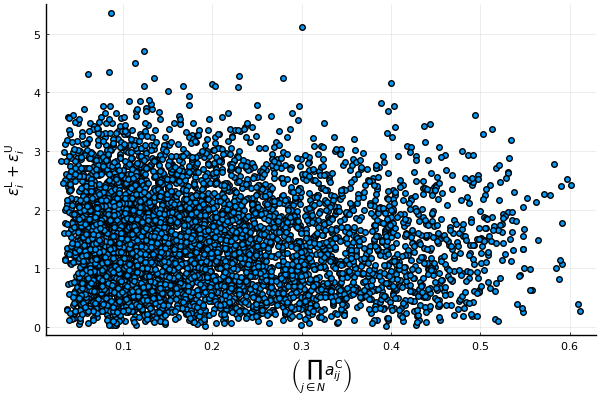

In [14]:
plot(GM, ε,
    seriestype=:scatter,
    xlabel=L"\left( \prod_{j \in N} a_{ij}^\mathrm{C} \right)",
    ylabel=L"\varepsilon_i^\mathrm{L} + \varepsilon_i^\mathrm{U}",
    legend=:none,
    )

In [15]:
cor(GM, ε)

-0.07765923034341779